<h1><b>1. Conoscenza Business</b></h1>
<h3><b>1.1 Obiettivo</b></h3>
<p>A partire dal dataset che contiene le transazioni di un rivenditore online registrato nel Regno Unito, lo scopo delle nostre analisi è identificare quali sono i prodotti più venduti e se c'è una correlazione con il loro prezzo, verificare se alcuni prodotti vengono acquistati insieme per creare pacchetti promozionali, analizzare in quali sono i paesi vengono effettuate più vendite, che quindi fanno generare un guadagno più alto al rivenditore, segmentare i clienti con comportamenti di acquisto simili per personalizzare marketing e offerte, verificare la presenza di tendenze di acquisto stagionali o cicliche e infine, sulla base degli ordini effettuati in passato, prevedere come procederanno le vendite in futuro.</p>

<h1><b>2. Conoscenza Dati</b></h1>

<h3><b>2.1. Raccolta Dati</b></h3>

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('data.xlsx')

# Display the first few rows of the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<h3><b>2.3. Descrizione Dati</b></h3>

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<p>Il dataset contiene 8 colonne:</p>
<ul>
    <li><b>InvoiceNo:</b> Numero di fattura. Variabile numerica.</li>
    <li><b>StockCode:</b> Codice prodotto. Variabile numerica.</li>
    <li><b>Description:</b> Descrizione prodotto. Variabile categorica.</li>
    <li><b>Quantity:</b> Quantità acquistata. Variabile numerica.</li>
    <li><b>InvoiceDate:</b> Data e ora della transazione. Variabile temporale.</li>
    <li><b>UnitPrice:</b> Prezzo unitario. Variabile numerica.</li>
    <li><b>CustomerID:</b> ID cliente. Variabile numerica.</li>
    <li><b>Country:</b> Paese. Variabile categorica.</li>
</ul>

<h4><b>2.4. Esploarzione Dati</b></h4>

In [30]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


<p>Considerazioni:</p>
<ul>
    <li>Presenza di valori negativi nelle colonne <b>Quantity</b> e <b>UnitPrice</b>, che potrebbe essere dovuta a valori anomali, oppure resi o cancellazioni di ordini.</li>
    <li>Presenza di valori mancanti nella colonna <b>CustomerID</b>. Dedotta dal fatto che il conteggio (<i>count</i>) dei valori non nulli in quella colonna e inferiore al numero totale di righe nel DataFrame.</li>
    <li>La grande variabilità dei prezzi unitari ci fa capire che il negozio vende una vasta gamma di prodotti con prezzi molto diversi</li>
</ul>

<h3><b>2.5 Verifica della Qualità dei Dati</b></h3>
<h4>Controllo Valori Mancanti</h4>

In [31]:
if df.isnull().sum().sum() > 0:
    print("Numero di valori Mancanti per Colonna:\n", df.isnull().sum())
else:
    print("Nessun valore mancante trovato")

Numero di valori Mancanti per Colonna:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


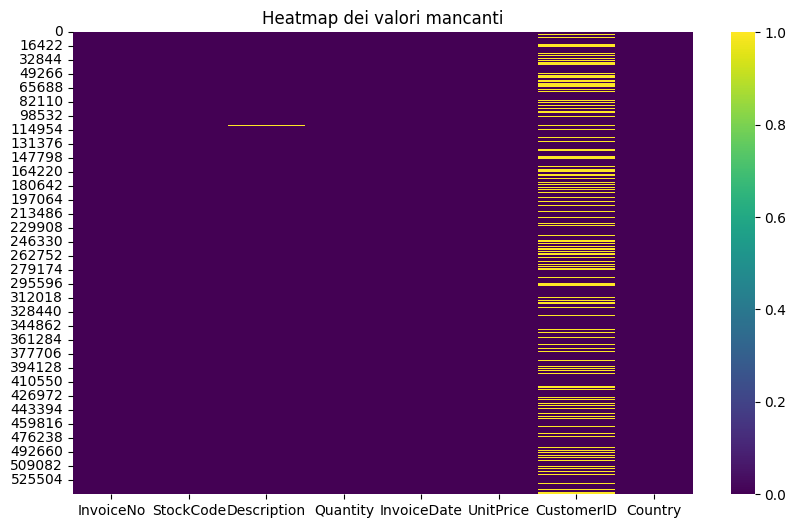

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap dei valori mancanti')
plt.show()

<h4><b>Spiegazione grafico:</b></h4>
<ul>
    <li>Nell'asse x abbiamo le colonne del dataset: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID e Country</li>
    <li>Nell'asse y abbiamo le righe del dataset</li>
    <li>I colori chiari indicano la presenza di un valore mancante in una determinata cella, che è l'incrocio tra una riga e una colonna</li>
    <li>I colori scuri indicano che il valore invece è presente</li>
</ul>

<p><b>Interpretazione grafico:</b></p>
<ul>
    <li>Le colonne InvoiceNo, StockCode, Quantity, InvoiceDate, Country e UnitPrice non presentano apparentemente valori mancanti (sono completamente viola scuro)</li>
    <li>La colonna Description ha alcuni valori mancanti, concentrati in una zona specifica. Questo potrebbe indicare un problema di inserimento dati in un determinato periodo o per specifici prodotti</li>
    <li>La colonna CustomerID mostra una grande quantità di valori mancanti</li>
</ul>

<h4>Controllo Valori Duplicati</h4>

In [33]:
if df.duplicated().sum() > 0:
    print("Numero di righe duplicate:", df.duplicated().sum())
else:
    print("Non ci sono righe duplicate")

Numero di righe duplicate: 5268


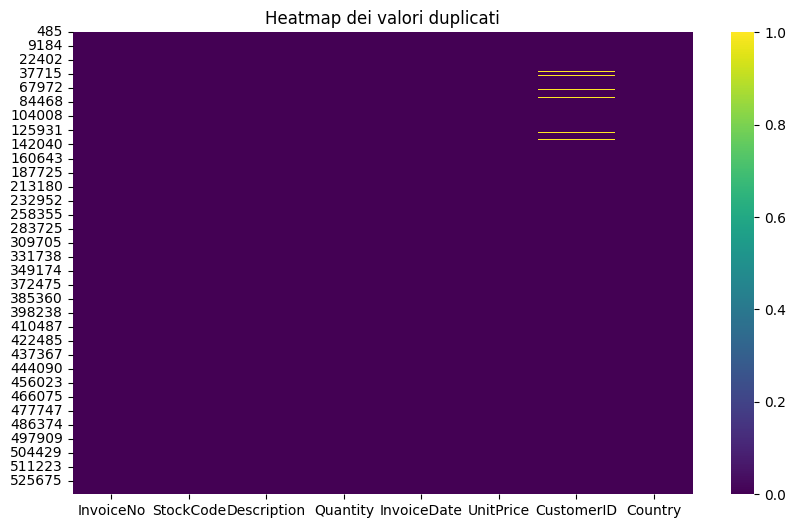

In [34]:
# Trova i duplicati
duplicates = df.duplicated(keep=False)
# Se si mette keep[True] troverà solo la prima occorrenza
# Se si mette keep[False] troverà tutte le occorrenze

# Crea una heatmap dei duplicati
plt.figure(figsize=(10, 6))
sns.heatmap(df[duplicates].isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap dei valori duplicati')
plt.show()

<p><b>Interpretazione grafico:</b></p>
<ul>
    <li>Sono presenti delle celle colorate di giallo che indicano la presenza di valori duplicati nella colonna CustomerID</li>
</ul>

<h4>Verifica Anomalie</h4>

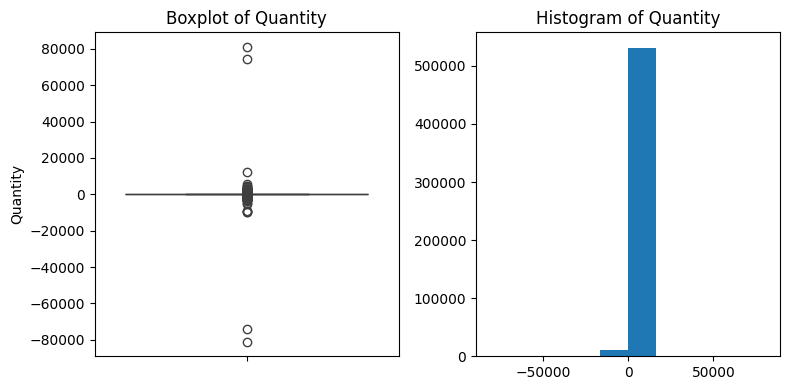

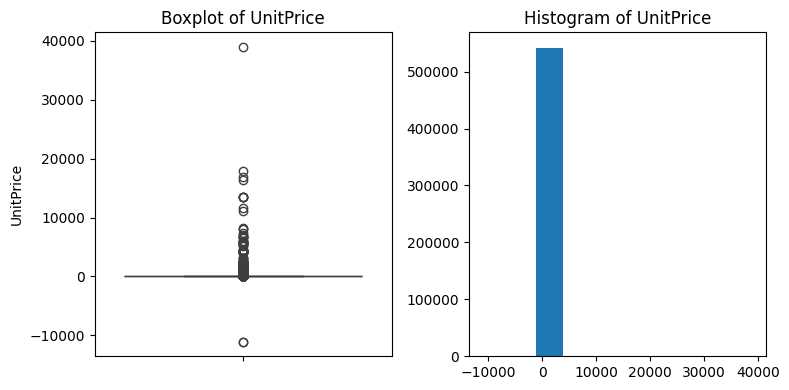

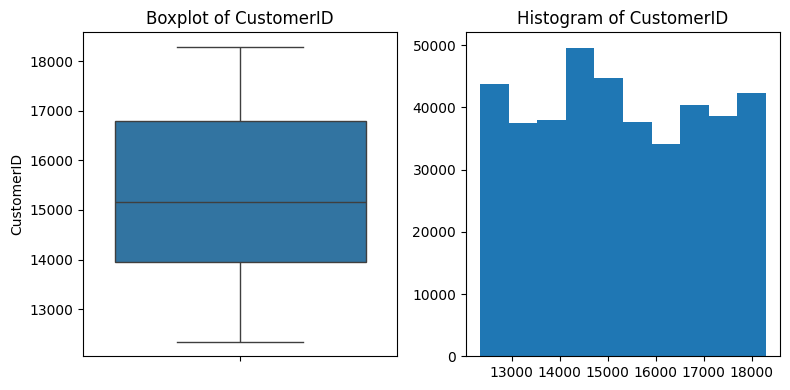

In [35]:
df_numeric = df.select_dtypes(include='number')

for i, col in enumerate(df_numeric.columns):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    sns.boxplot(data=df[col], ax=axs[0])
    axs[0].set_title(f"Boxplot of {col}")
    axs[1].hist(df[col])
    axs[1].set_title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

<p>Considerazioni:</p>

<code>Perché non si vedono i baffi?</code>

<p>Il motivo é dovuto dalla presenza degli outlier, che hanno valori molto (positivi e negativi) elevati. Questo "allarga" la scala, rendendo impercettibili le piccole variazioni intorno allo zero, dove si trovano la scatola e i baffi.</p>

<h1><b>3. Preparazione Dati</b></h1>
<h2><b>3.1 Verifica di valori mancanti, duplicati, o anomali</b></h2>

<h2><b>3.1. Pulizia Dati</b></h2>
<h2><b>3.2. Trasformazione Dati</b></h2>

<h1><b>4. Costruzioen Modello</b></h1>
<h2><b>4.1. Selezione Modello</b></h2>
<h2><b>4.2. Addestramento Modello</b></h2>
<h2><b>4.3. Valutazione Modello</b></h2>

<h1><b>5. Valutazione</b></h1>
<h2><b>5.1. Risultati</b></h2>
<h2><b>5.2. Conclusioni</b></h2>
<h2><b>5.3. Possibili Miglioramenti</b></h2>